# <span style="color:#9c27b0;font-weight:500;font-weight:500"> QTM 151 Final Project: The Relationship Between Pit-Stops and Driver Performance </span>
<span style="color:#276bb0;font-size:20px">Anushka Basu, Vivian Song, Mohan Wang<br>Section 1 - MW 4:00-4:50</span>

## <span style="color:#60c689"> I. Introduction </span>

Formula 1 (F1) is the highest level of single-seat open-wheel car racing series and is often considered one of the most, if not the most, prestigious and famous car racing series in the world. In a race season that spans several months, there are multiple teams, each team contains two drivers, racing against each other in racing circuits across different nations. The higher one’s finishing position is, the better the result. Various factors influence the results of a race, such as car performance, driver performance, weather, pit stop strategies, etc. This project will focus on the influence of pit stops. 

To analyze our data, we merged these datasets using identifying key variables, which allowed us to combine information on pit stops, race results, and driver details into one dataset. We then cleaned our data by extracting relevant columns, removing placeholder values, converting variables to numerical types, and aggregating the data. We then calculated the sum of pit stop times and the total time spent by each driver in a race. To visualize our data, we created a scatter plot of the relationship between total pit stop time and total time, before eliminating outlier points to make a closer analysis. Finally, we employed a linear regression model to give us a line of best fit between total pit stop time and total time, which was laid over the scatter plot. 

## <span style="color:#60c689"> II. Datasets </span>

We were interested in testing the relation between the duration of pit stops and drivers’ final results. We aim to seek if the duration of pit stops have an overall impact on the race. 

To answer our questions, we are using three datasets: `pit_stops.csv`, `drivers.csv`, and `results.csv`, which we import as `pit_stops`, `drivers`, and `results` respectively. The datasets contain F1 data from 1950 to 2023. The dataset `pit_stops` contains data related to pit stop times. It has 9634 rows, where each row represents a single pit stop. The dataset `drivers` contains demographic data on F1 drivers. It has 857 rows, where each row represents a different F1 driver. Finally, the dataset `results` contains race results and times data. It has 25840 rows, each representing the results of a single driver for a single race.


In [133]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

# Import datasets
pit_stops = pd.read_csv("Formula1-DatasetFull/raw_data/pit_stops.csv")
results = pd.read_csv("Formula1-DatasetFull/raw_data/results.csv")
drivers = pd.read_csv("Formula1-DatasetFull/raw_data/drivers.csv")

After importing the necessary libraries and datasets for our analysis, we began our research by looking over the state of our data.

In [2]:
# Display pit stops data as a table 
display(pit_stops) # Note that our variable of interest is 'milliseconds', which is numerical, rather than 'duration'

# Counts the number of rows/observations
print("This dataset has " + str(len(pit_stops)) + " rows.")

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
9629,1096,849,2,38,18:02:50,25.174,25174
9630,1096,840,2,40,18:04:44,21.802,21802
9631,1096,839,2,41,18:06:09,21.734,21734
9632,1096,846,2,42,18:07:36,21.559,21559


This dataset has 9634 rows.


In [3]:
# Display drivers data as a table
display(drivers)

# Counts the number of rows/observations
print("This dataset has " + str(len(drivers)) + " rows.")

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
854,856,de_vries,45,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri


This dataset has 857 rows.


In [4]:
# Display race results data as a table
display(results) # Note that our variable of interest is 'milliseconds', which is numerical, rather than 'time'

# Counts the number of rows/observations
print("This dataset has " + str(len(results)) + " rows.")

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47,12,16,16,16,0.0,57,\N,\N,39,12,1:29.833,211.632,11
25836,25842,1096,825,210,20,16,17,17,17,0.0,57,\N,\N,40,20,1:31.158,208.556,11
25837,25843,1096,1,131,44,5,18,18,18,0.0,55,\N,\N,42,11,1:29.788,211.738,9
25838,25844,1096,849,3,6,20,19,19,19,0.0,55,\N,\N,45,14,1:30.309,210.517,130


This dataset has 25840 rows.


## <span style="color:#60c689"> III. Data Cleaning </span>

In order to compare pit stop time and race time observations, it was necessary for us to merge the datasets. In our precursory look at the data, we determined that both `pitstops` and `results` used the variables `raceId` and `driverId` as keys to identify observations associated with a particular race and driver, respectively. On the other hand, `drivers` only uses `driverId` as the identifying key. Therefore, we decided to left-join `drivers` to `pitstops` and inner-join `results` to that data, as we are only interested in observations which we have both pit stop and race results data for.

After merging, we are left with a `merged` dataset of 9634 observations, where each row contains data for a single pit stop of a race, as well as its associated results and (potentially) driver demographic data.

In [115]:
merged = pit_stops.merge(drivers, how="left", on="driverId").merge(results, how="inner", on=["raceId", "driverId"])
display(merged)

,raceId,driverId,stop,lap,time_x,duration,milliseconds_x,driverRef,number_x,code,...,positionOrder,points,laps,time_y,milliseconds_y,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,841,153,1,1,17:05:23,26.898,26898,alguersuari,\N,ALG,...,11,0.0,57,\N,\N,41,10,1:30.467,211.025,11
1,841,153,2,17,17:31:06,24.463,24463,alguersuari,\N,ALG,...,11,0.0,57,\N,\N,41,10,1:30.467,211.025,11
2,841,153,3,35,17:59:45,26.348,26348,alguersuari,\N,ALG,...,11,0.0,57,\N,\N,41,10,1:30.467,211.025,11
3,841,30,1,1,17:05:52,25.021,25021,michael_schumacher,\N,MSC,...,19,0.0,19,\N,\N,13,21,1:35.319,200.283,4
4,841,30,2,17,17:32:08,23.988,23988,michael_schumacher,\N,MSC,...,19,0.0,19,\N,\N,13,21,1:35.319,200.283,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9629,1096,830,1,20,17:33:31,22.735,22735,max_verstappen,33,VER,...,1,25.0,58,1:27:45.914,5265914,54,6,1:29.392,212.676,1
9630,1096,844,1,21,17:35:10,22.210,22210,leclerc,16,LEC,...,2,18.0,58,+8.771,5274685,48,10,1:29.719,211.901,1
9631,1096,20,1,25,17:41:51,23.186,23186,vettel,5,VET,...,10,1.0,58,+1:23.898,5349812,35,15,1:30.312,210.510,1
9632,1096,825,1,28,17:46:53,22.387,22387,kevin_magnussen,20,MAG,...,17,0.0,57,\N,\N,40,20,1:31.158,208.556,11


To clean our data, we filtered our dataset down to our variables of interest, which include `forename`, `surname`, `milliseconds_x` (pit stop time), and `milliseconds_y` (race time). By looking at the variable types, we determine that only the `milliseconds_y` variable contains unexpected non-numerical values. A quick check of the dataset determines that the offending values are '\N' (new-line) characters. We select a subset of rows that do not contain '\N' and check the dataset to confirm that all necessary values are now numerical, then finish by coercing `milliseconds_y` into an integer type.

In [124]:
merged_clean = merged[['driverId', 'raceId', 'forename', 'surname', 'milliseconds_x', 'milliseconds_y']]
display(merged_clean.dtypes)
display(merged_clean.query("milliseconds_y.str.isnumeric() == False"))

# Clean out non-numerical entries
merged_clean = merged_clean[merged_clean['milliseconds_y'] != '\\N']
display(merged_clean.query("milliseconds_y.str.isnumeric() == False"))
merged_clean['milliseconds_y'] = merged_clean['milliseconds_y'].astype(int)

driverId           int64
raceId             int64
forename          object
surname           object
milliseconds_x     int64
milliseconds_y    object
dtype: object

,driverId,raceId,forename,surname,milliseconds_x,milliseconds_y
0,153,841,Jaime,Alguersuari,26898,\N
1,153,841,Jaime,Alguersuari,24463,\N
2,153,841,Jaime,Alguersuari,26348,\N
3,30,841,Michael,Schumacher,25021,\N
4,30,841,Michael,Schumacher,23988,\N
...,...,...,...,...,...,...
9623,849,1096,Nicholas,Latifi,25174,\N
9626,1,1096,Lewis,Hamilton,21270,\N
9627,4,1096,Fernando,Alonso,21740,\N
9632,825,1096,Kevin,Magnussen,22387,\N


,driverId,raceId,forename,surname,milliseconds_x,milliseconds_y


Since a single race result might be associated with a variable number of pit stops, we may be able to draw more meaningful conclusions from our data by aggregating the total pit stop time for each race. We created another dataset with such data by grouping `merged_clean` by `driverId` and `raceId`, then calculating the sum of all pit stop times for each driver and race. We also included `milliseconds_y` in this dataset, renaming it to `total_time`. Finally, we reset the indices to isolate the IDs from the index.

In [126]:
# aggregate total pitstop and race time for each driver and race
merged_agg = (merged_clean.groupby(['driverId','raceId'])
              .agg(total_pitstop = ('milliseconds_x', 'sum'),
                   total_time = ('milliseconds_y', 'max'))
              .reset_index())
display(merged_agg)

,driverId,raceId,total_pitstop,total_time
0,1,841,46426,5392556
1,1,842,93011,5929789
2,1,843,61978,5818226
3,1,844,99637,5457790
4,1,845,81457,5943931
...,...,...,...,...
2481,855,1089,25366,4835421
2482,855,1092,458834,10991047
2483,855,1093,52341,6207851
2484,855,1095,49443,5943369


Note that we now have our two main variables of interest: `total_pitstop` and `total_time`. A summary table of both variables is shown below. The mean, standard deviation, and all quartiles of `total_time` exceed those of `total_pitstop`, which is expected considering the context of the values. However, `total_pitstop` has a proportionally-large standard deviation, which is more than two times the mean, as well as a significant difference between its mean (191,829.4) and median (47,076.0). These two values suggest that total pit stop time has low centrality and is heavily skewed right.  

In [102]:
# create summary table
merged_agg[['total_pitstop', 'total_time']].describe()

,total_pitstop,total_time
count,2.486000e+03,2.486000e+03
mean,1.918294e+05,6.021649e+06
std,5.342989e+05,1.199067e+06
min,1.743400e+04,4.526665e+06
25%,2.966675e+04,5.422648e+06
50%,4.707600e+04,5.765642e+06
75%,6.710825e+04,6.174459e+06
max,3.572090e+06,1.474314e+07


## <span style="color:#60c689"> IV. Results </span>

First, we plotted the `merged_agg` dataset using the scatterplot below, where `total_pitstop` is on the x-axis and `total_time` is on the y-axis. At first glance, there is little we can tell from the graph. The points are extremely clustered on the lower left; this is likely due to the large number of outliers from the skew we noticed in the pit stop summary statistics. These “messed up” pit stops take significantly more time than a normal one, and would significantly influence the scale and line of best fit of the data. Since this project aims to investigate whether nuanced differences (likely in the scale of a few seconds) in pit stop duration can be related to a more dramatic difference in final results, these significant outliers are better dropped. 

We identified a "space" in the graph around 300,000 milliseconds, which is marked by the dashed line. Then, we replotted the data, dropping pit stops that took over 300,000 milliseconds (30 seconds). 

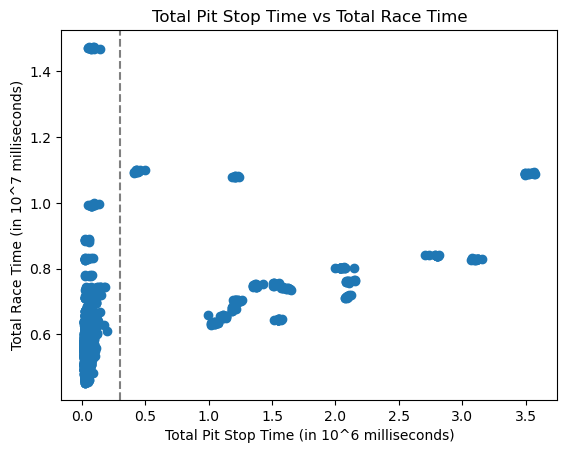

In [167]:
# plot Total Pit Stop Time vs Total Race Time
plt.scatter(merged_agg['total_pitstop']/1000000, merged_agg['total_time']/10000000)
plt.axvline(0.3, color = "gray", linestyle = "dashed") # there is a vertical space here
plt.xlabel("Total Pit Stop Time (in 10^6 milliseconds)")
plt.ylabel("Total Race Time (in 10^7 milliseconds)")
plt.title("Total Pit Stop Time vs Total Race Time")
plt.show()

After removing the unwanted pit stops, a potential trend in the data is more visible. The data is still clustered near the lower left, but a slight positive trend can now be seen. We decide to conduct a linear regression using this subset of data, since regressions can be heavily influenced by outliers.

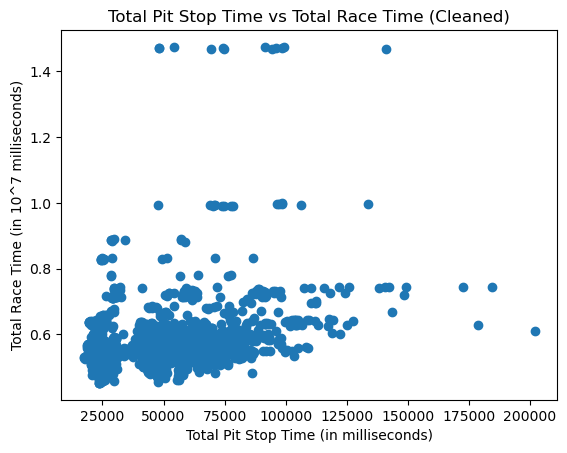

In [168]:
# filtered subset excluding outliers in pit stop time
merged_agg2 = merged_agg[merged_agg['total_pitstop'] <= 300000]

# replotted graph
plt.scatter(merged_agg2['total_pitstop'], merged_agg2['total_time']/10000000)
plt.xlabel("Total Pit Stop Time (in milliseconds)")
plt.ylabel("Total Race Time (in 10^7 milliseconds)")
plt.title("Total Pit Stop Time vs Total Race Time (Cleaned)")
plt.show()

After running a linear regression on `merged_agg2`, we created the table shown below. We also retrieved a correlation coefficient of 0.3108, which shows a weak positive correlation between pit stop duration and the time that driver takes to finish the race. The slope of the regression line is 13.33869 and intercept is about 5,192,921.

In [173]:
# get linear model and fit to data
model = smf.ols(formula = 'total_time ~ total_pitstop', data = merged_agg2)
results = model.fit()
b_list = results.params

# print correlation coefficient and regression data
print(np.corrcoef(merged_agg2["total_time"], merged_agg2["total_pitstop"]))
print(summary_col(results, stars = True))

[[1.         0.31083704]
 [0.31083704 1.        ]]

                  total_time  
------------------------------
Intercept      5192921.0476***
               (45507.7425)   
total_pitstop  13.3387***     
               (0.8551)       
R-squared      0.0966         
R-squared Adj. 0.0962         
Standard errors in
parentheses.
* p<.1, ** p<.05, ***p<.01


We then calculated the line of best fit for our data using the b-values from our regression. As shown in the graph, the line of best fit shows a weak positive correlation between our two variables. That means the longer pit stop duration (in a nuanced way, excluding significant outliers) is weakly positively related to a longer finishing time. 

C:\Users\raven\AppData\Local\Temp\ipykernel_23496\3686905939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_agg2["p_estimated"] = b_list[0] + b_list[1]*merged_agg2["total_pitstop"]


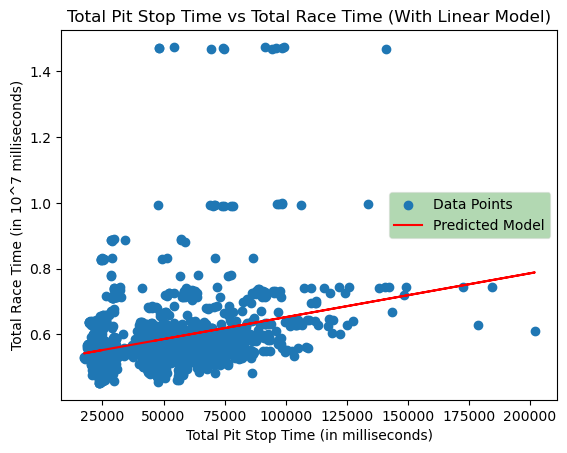

In [160]:
merged_agg2["p_estimated"] = b_list[0] + b_list[1]*merged_agg2["total_pitstop"]
plt.scatter(merged_agg2['total_pitstop'], merged_agg2['total_time']/10000000)
plt.plot(merged_agg2["total_pitstop"], merged_agg2["p_estimated"]/10000000, color = 'red')
plt.xlabel("Total Pit Stop Time (in milliseconds)")
plt.ylabel("Total Race Time (in 10^7 milliseconds)")
plt.title("Total Pit Stop Time vs Total Race Time (With Linear Model)")
plt.legend(["Data Points", "Predicted Model"], facecolor = "green", framealpha = 0.3, loc = "right")
plt.show()

## <span style="color:#60c689"> V. Conclusion </span>

Our investigation of F1 racing provided us with some interesting results. By analyzing three datasets from 1950 to 2023, we found a slight positive correlation between pit stop duration and the time drivers take to finish a race, which suggests that, on average, longer pit stop durations are associated with slightly longer finishing times. This analysis provides valuable insights into how variables like pit stop duration may potentially impact F1 race outcomes. 